# Outline
- [ 1 - Little bit of theory behind SVM](#1)
- [ 2 - Import Data](#2)
- [ 3 - <TODO>](#3)
- [ 4 - <TODO>](#4)
- [ 5 - <TODO>](#5)

<a name="1"></a>
## 1 - Little bit of theory behind SVM

Support Vector Machine (SVM) is a powerful tool for classification tasks, focusing on finding the best 
<br>boundary that separates different classes while maximizing the margin.
<br>The objective of SVM is to find the hyperplane that maximizes the margin between two classes. 
<br>The equation for the hyperplane can be expressed as:
$$
w^T x + b = 0
$$
Where:
- \( w \) is the weight vector.
- \( x \) is the input feature vector.
- \( b \) is the bias term.
The margin is defined as the distance between the hyperplane and the closest data points from each class, known as support vectors. 
$$
\frac{1}{2} \| w \|^2
$$
The optimization problem can be formulated as:
$$
\begin{align*}
    \begin{cases}
        \min_{w,b,\xi} \frac{1}{2} \| w \|^2+C\displaystyle\sum_{i=1}^l \xi_i\\
        y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \forall i\\
        \xi_i\geq0
    \end{cases}
\end{align*}
$$
<br>(Primal problem SVM)
<br>Where:
- \(y_i) is the class label of the training example \( x_i \) (either +1 or -1).
- \( i \) indexes the training examples.
- \(kxi_i) - permission for model to make mistake for the object are inside margin or on the other side of hyperplane
- \(sum_of_kxi_i) - requarement for this mistakes to be as small as possible

This is nonlinear optimization problem. For solving this problem we need to use the [`Karush–Kuhn–Tucker (KKT) conditions`](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) 
<br>and formulate the Lagrangian function in order to solve the dual problem.
<br>Let's wright down a Lagrangian of our optimization problem:
$$
L(w,b,\xi,\lambda,\mu)=\frac{1}{2} \| w \|^2+C\displaystyle\sum_{i=1}^l \xi_i-\displaystyle\sum_{i=1}^l \lambda_i(y_i (<w, x_i> + b)-1+\xi_i)-\displaystyle\sum_{i=1}^l \mu_i\xi_i
$$
Were lambda and mu are dual coeffitiants.
So let's wright the gradients with respect to each variables.
<br>Start from w and look what we'll get:
$$
\nabla_w L=w-\displaystyle\sum_{i=1}^l \lambda_iy_ix_i
;\nabla_w L=0=>
$$
$$
w=\displaystyle\sum_{i=1}^l \lambda_iy_ix_i
$$ (1)
<br>Based on this formula we can see that the solution for the problem is lies in finding lambdas.
<br>Now we need to wright gradient (in this case it is partial derivative) with respect to b:
$$
\nabla_b L=\displaystyle\sum_{i=1}^l \lambda_iy_i
;\nabla_b L=0 =>
$$ 
$$
\displaystyle\sum_{i=1}^l \lambda_iy_i=0
$$
(2)
<br>And finaly for ksi:
$$
\nabla_\xi L=C-\lambda_i-\mu_i
;\nabla_xi L=0=>
$$
$$
\lambda_i+\mu_i=C
$$ (3)
<br>And we also need to wright down co called Complementary slackness that sayes that the constrained functions are equal zero in solution point:
<br>This is the first one:
$$
\lambda_i(y_i (<w, x_i> + b)-1+\xi_i)=0  =>
$$
$$
\lambda_i=0 \lor y_i (<w, x_i> + b)=1-\xi_i
$$ (4)
<br>And the second one:
$$
\mu_i\xi_i=0=>
$$
$$
\mu_i=0 \lor \xi_i=0
$$ (5)

#### Types of objects based on our expressions

<br>1. lambda_i = 0
$$
\lambda_i=0; (3) => \mu_i=C; (5) => \xi_i=0; => y_i (<w, x_i> + b)\geq1
$$
<br> This types of object does't influese on solution.

<br>2. 0<lambda_i<C => this object does not cross the margin but lies on that line. This is the Support Vector.
$$
0<\lambda_i<C; (3) => \mu_i\neq0; (5) => \xi_i=0; => y_i (<w, x_i> + b)=1, y_i\in{-1,+1}
$$
$$
b = 1/y_i-w^T x_i => b = y_i-w^T x_i
$$

<br>3. Lambda_i = C and xsi_i > 0 => object crosses the magrin line
$$
\lambda_i=C; (3) => \mu_i=0; (5) => \xi_i>0;
$$

Befor we formulate dual problem let's make some simplification to our Lagrangian and take into account (2) and (3)
$$
L=\frac{1}{2}w*w+C\displaystyle\sum_{i=1}^l \xi_i-\displaystyle\sum_{i=1}^l \lambda_i(y_i (<w, x_i> + b)-1+\xi_i)-\displaystyle\sum_{i=1}^l \mu_i\xi_i =>
$$
$$
L=\frac{1}{2}w*w-\displaystyle\sum_{i=1}^l \lambda_iy_i<w, x_i>-\displaystyle\sum_{i=1}^l \lambda_iy_ib+\displaystyle\sum_{i=1}^l \lambda_i+(C\displaystyle\sum_{i=1}^l \xi_i-\displaystyle\sum_{i=1}^l \lambda_i\xi_i - \displaystyle\sum_{i=1}^l \mu_i\xi_i) =>
$$
$$
L=\frac{1}{2}w*w-\displaystyle\sum_{i=1}^l \lambda_iy_i<w, x_i>-\displaystyle\sum_{i=1}^l \lambda_iy_ib+\displaystyle\sum_{i=1}^l \lambda_i+\displaystyle\sum_{i=1}^l \xi_i(C-\lambda_i-\mu_i) =>
$$
From (2) and (3) will get
$$
L=\frac{1}{2}w*w-\displaystyle\sum_{i=1}^l \lambda_iy_i<w, x_i>+\displaystyle\sum_{i=1}^l \lambda_i=>
$$

$$
L=\frac{1}{2}\displaystyle\sum_{i=1}^l \lambda_iy_ix_i*\displaystyle\sum_{i=1}^l \lambda_iy_ix_i-\displaystyle\sum_{i=1}^l \lambda_iy_ix_i*\displaystyle\sum_{i=1}^l \lambda_iy_ix_i + \displaystyle\sum_{i=1}^l \lambda_i
$$


$$
L=\displaystyle\sum_{i=1}^l \lambda_i-\frac{1}{2}\displaystyle\sum_{i,j=1}^l \lambda_i\lambda_jy_iy_j<x_i, x_j>
$$
where
$$
<x_i, x_j> = x_i^Tx_j
$$
and that expression can be writen as kernal K(<x_i,x_j>) to represent our object in some 
<br>higher dimentional space, where this object can be lenearly separated with hyperplane and this is so caled "kernal trick".

And now we can wright the dual problem, which will be the maximization problem, for our original task of minimization:
$$
\begin{align*}
    \begin{cases}
        \max_{\lambda} (\displaystyle\sum_{i=1}^l \lambda_i-\frac{1}{2}\displaystyle\sum_{i,j=1}^l \lambda_i\lambda_jy_iy_j<x_i, x_j>)\\
        \displaystyle\sum_{i=1}^l \lambda_iy_i=0\\
        0\leq\lambda_i\leq C
    \end{cases}
\end{align*}
$$
(Dual problem SVM)

<a name="1"></a>
## 1 - Import Data

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv("/Users/sergeiakhmadulin/My Drive/SVM/breast-cancer.csv")

In [60]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

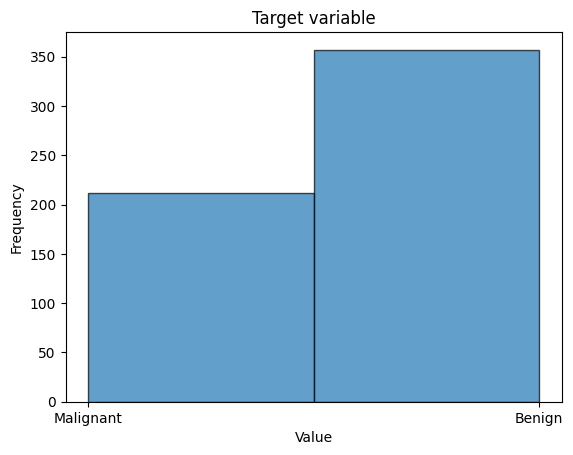

In [67]:
plt.hist(data["diagnosis"].map({"B": "Benign", "M": "Malignant"}), bins=2, edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Target variable')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [78]:
data["diagnosis"] = data["diagnosis"].map({"B": 1, "M": -1})

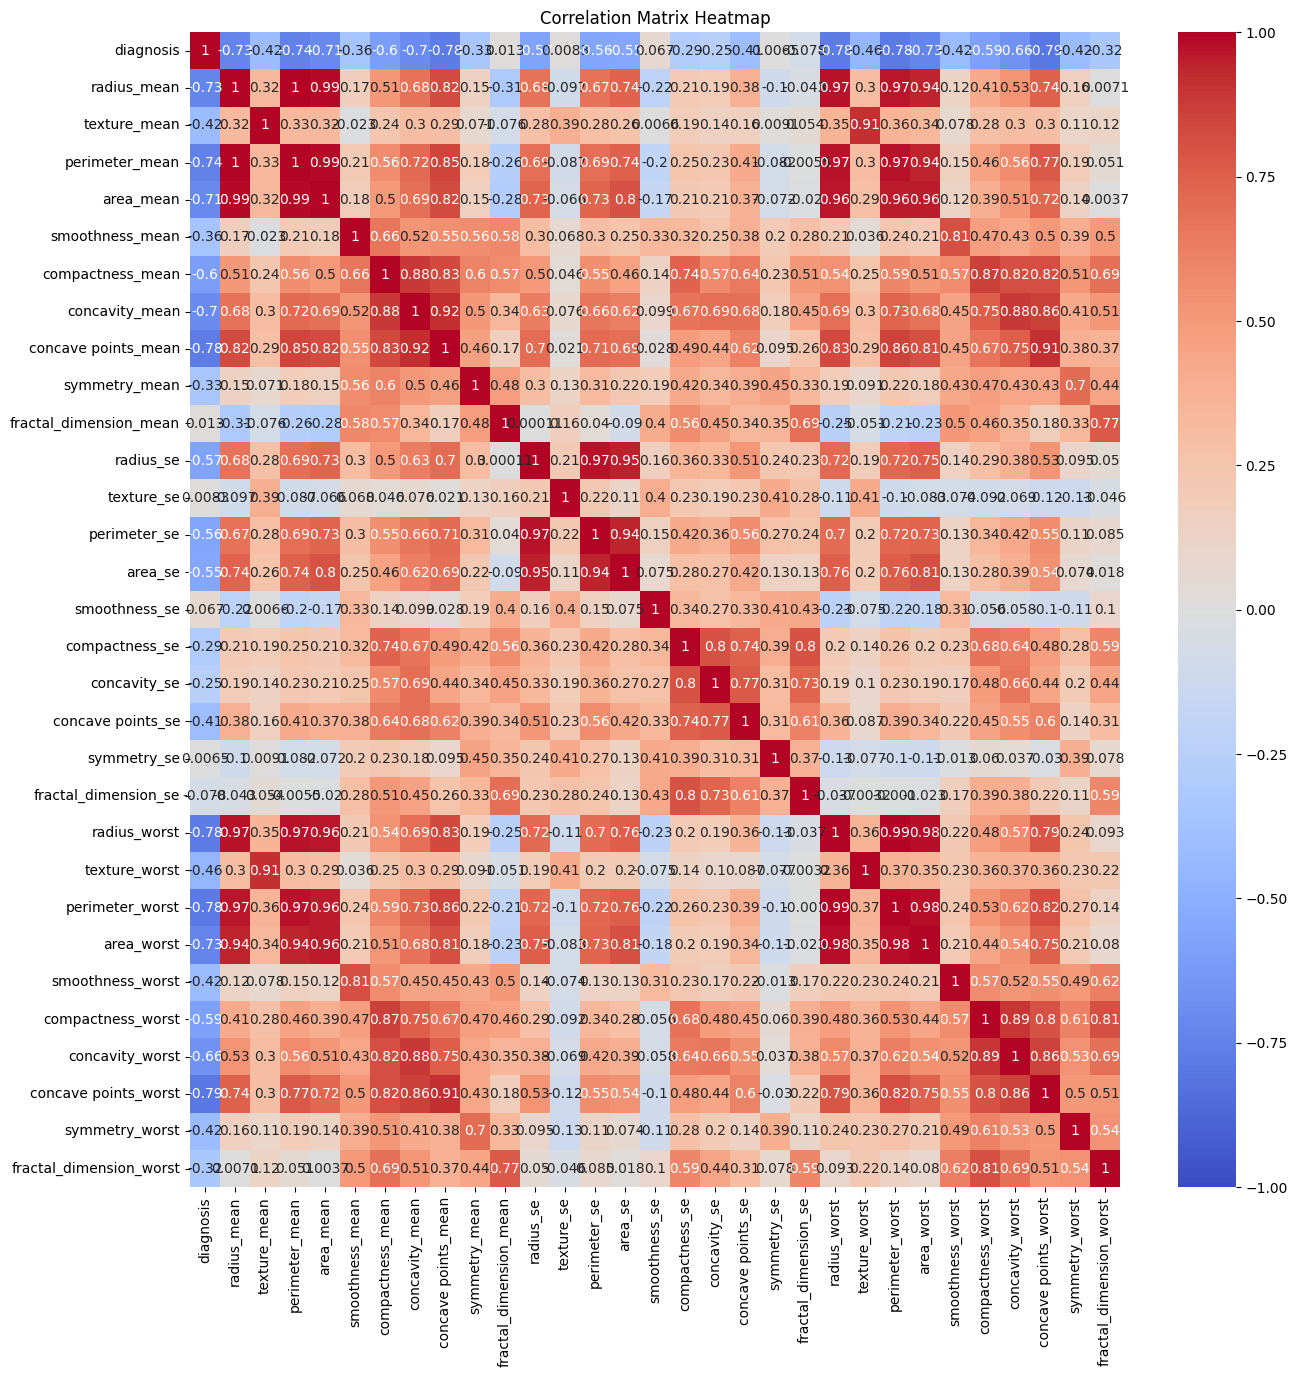

In [79]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [89]:
data_short = data[["id","diagnosis","radius_mean","texture_worst","smoothness_mean","symmetry_mean","fractal_dimension_mean","texture_se","smoothness_se","symmetry_se"]]

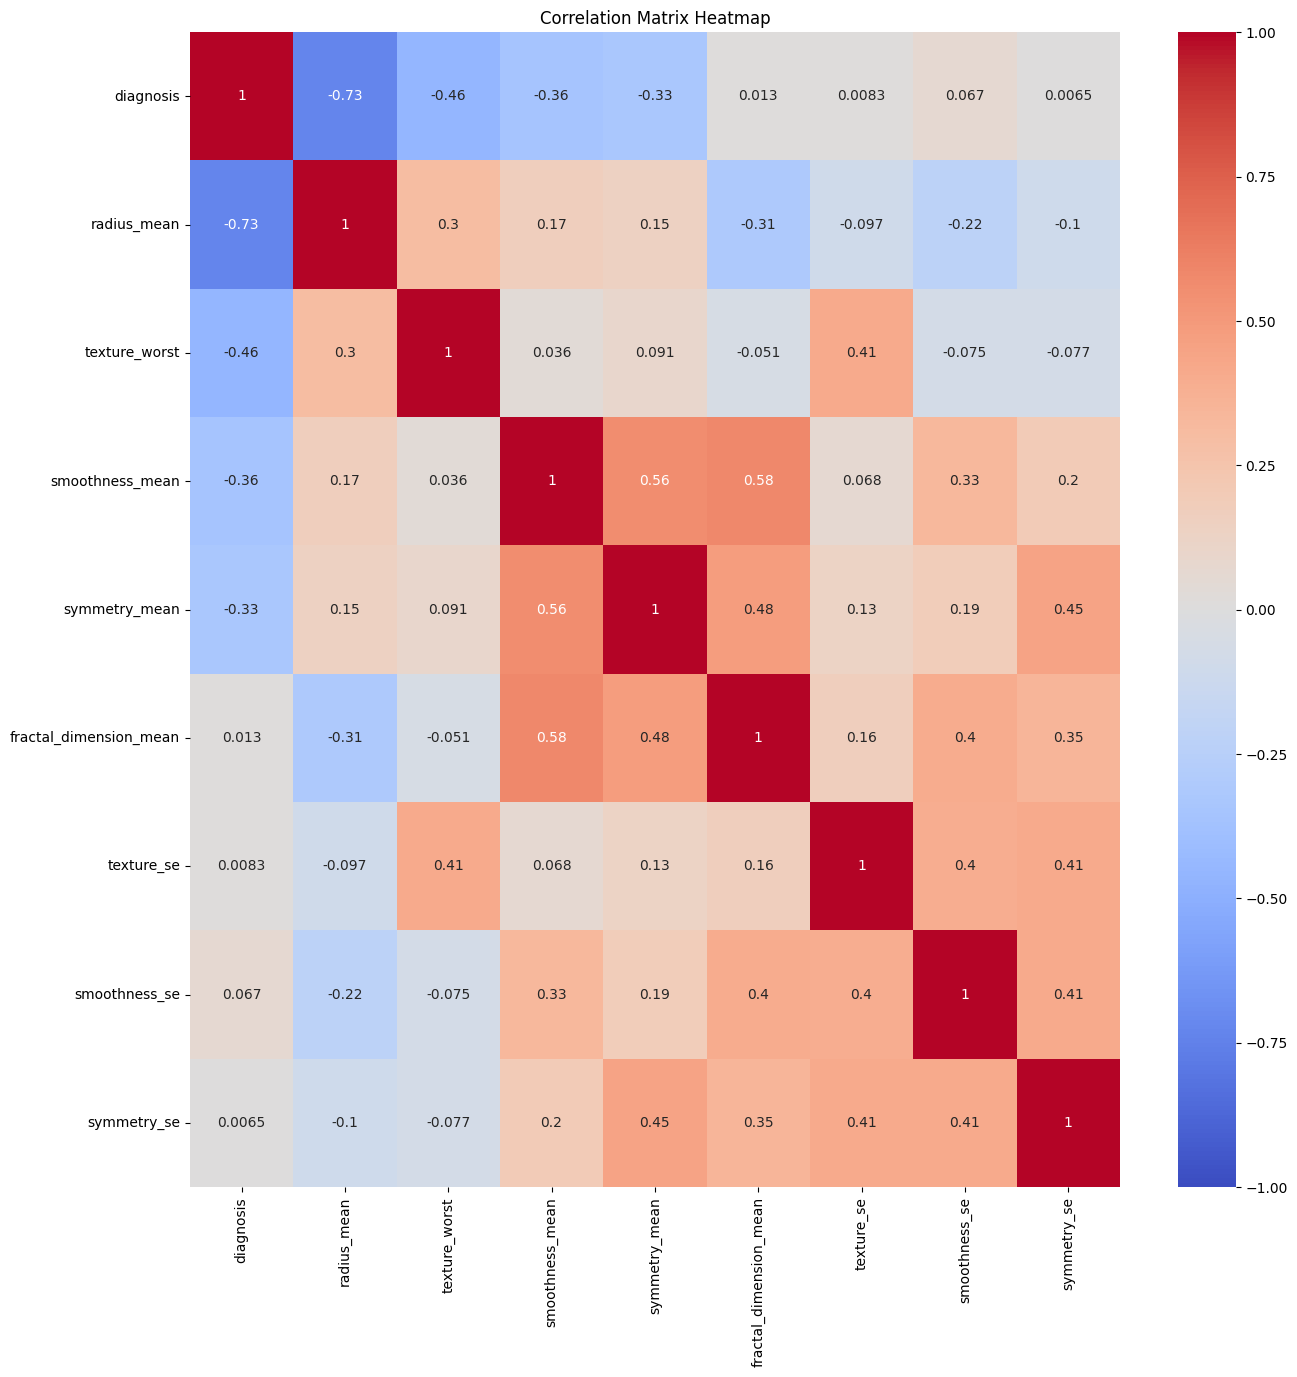

In [90]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_short.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, auc
import numpy as np

In [133]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(data.iloc[:, 2:], data.iloc[:, 1:2])

DecisionTreeClassifier(random_state=42)

In [134]:
feature_importances = dt.feature_importances_

Important features based on Decision Tree:
radius_worst


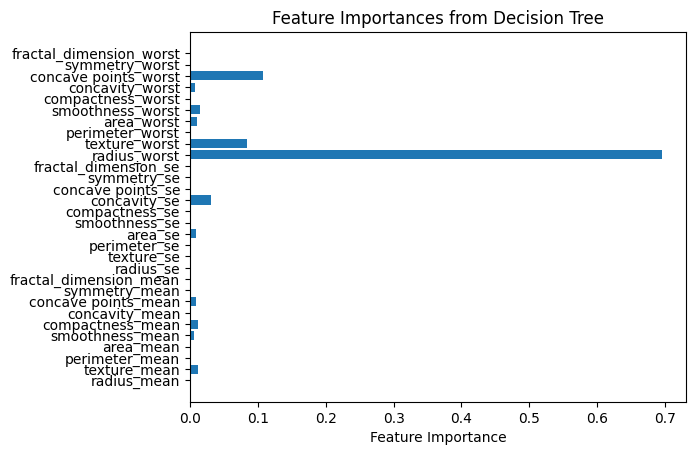

In [135]:
print("Important features based on Decision Tree:")
print(data.iloc[:, 2:].columns[np.argmax(feature_importances)])

# Step 5: Plot the feature importances
plt.barh(data.iloc[:, 2:].columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importances from Decision Tree")
plt.show()

In [137]:
X = data[["radius_worst", "concavity_worst", "texture_worst"]]
y = data[["diagnosis"]]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
svm_clf = SVC(kernel='rbf', gamma='scale',probability=True) 
svm_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [159]:
y_pred = svm_clf.predict(X_test)
y_pred_prob = svm_clf.predict_proba(X_test)

In [160]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9532


In [161]:
target_names = ["Benign", "Malignant"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.97      0.90      0.93        63
   Malignant       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [163]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[0])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [171, 2]

In [156]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 57   6]
 [  2 106]]


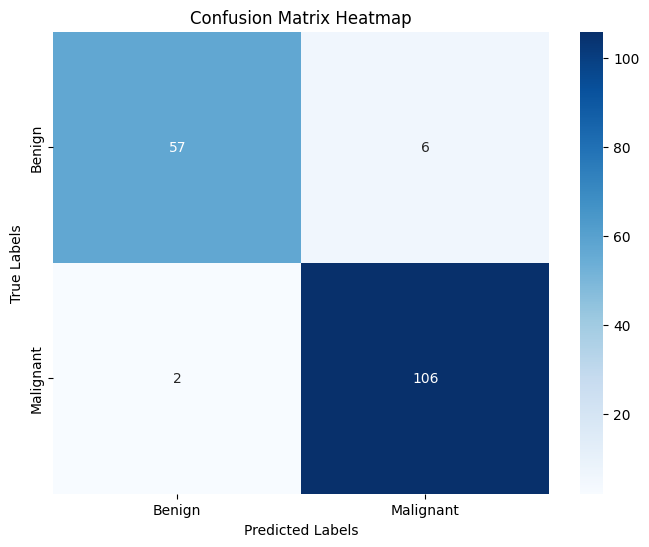

In [167]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=target_names, yticklabels=target_names)

# Set plot labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Show the plot
plt.show()